# Forecasting U.S. Dollar Future prices using a VAR model

Alexandru Giurca, VU Amsterdam, November 2019

**Summary**

One of the main needs when we talk about trading is to make some kind of forecast about the future status of the instrument operated so that we can position our offers. As one of the objectives of the analysis of multivariate time series is the realization of forecasts, in this activity I will implement a model of this class called Vector Auto Regressive (VAR). I will fit the model to the DOLLAR book information.

## 1. Introduction

From a trading point of view, we need to make decisions about whether to hold a position or not, buy, sell or even do nothing. If we have a time series of observations related to the variable of interest (e.g. instrument or spread trade) and if these data contain information about its dynamics, it is reasonable to use some function of the data already collected, for the forecast, of way that:

$$\hat{y}_{K,\, T+1} = f \left(y_{1, T}, y_{2, T}, y_{1, T-1}, \dots \right)$$

where $ y_{k, t} $ denotes a random variable, $ t $ denotes its index over time and $ k $, the index of the variable itself. The forecast equation above implies that there may be interdependence between the variables used. These multiple variables can be the returns of different assets, macroeconomic variables etc.

Since the time series is a set of random variables, we assume that this series is generated by a stochastic process with an associated  probability space $ \left(\Omega, \, \mathscr{F}, \, P \right) $, where $\Omega $ is the sample space, $ \mathscr{F}$ or $ \sigma$-algebra represents all possible subsets of $ \Omega $ and $ P $, the probability measure. We define that a random variable is a function that associates elements of a $ \Omega $ sample space with values in the set of real numbers.

Thus, assuming that our data are realizations of random variables, that the same data-generating process prevails over the entire $ T $ period (although not known) and that linear functions (in the parameters) are relatively easy to deal with, we can write a vector auto-regressive process so that:
$$y_t = \mu + A_q y_{t-1} +  \dots + A_p y_{t-p} + u_t$$

where $ y_t: = \left(y_ {1t}, \dots, y_ {Kt} \right)'$ is a vector of random variables, $ \mu:= \left(\mu_{t}, \dots, \mu_{K} \right)'$ is a vector of constants, $ A $ is a square matrix of parameters and $u_t = \left(u_{1t}, \dots, u_{Kt} \right)$ is a string dops forecast errors, taken as iid with expectation $ 0 $. This is equivalent to saying that all the useful information contained in $ \sigma$-algebra has been incorporated into $ y_t $ and there are no systematic errors in the forecasts.

In this work I will estimate the parameters of the model above, which is also called the autoregressive vector model (VAR). Since it is an AR, it is expected that the data used as input will be weakly stationary (first and second invariant moments), respecitvely all eigenvalues of $ A $ have a module less than 1).

When choosing the model, model order selection will be performed. This involves selecting a model order that minimizes one or more information criteria evaluated over a range of model orders. Commonly used information criteria include, Akaike Information Criterion (AIC), Schwarz-Bayes Criterion (SBC) – also known as the Bayesian Information Criterion (BIC) – Akaike’s Final Prediction Error Criterion (FPE), and Hannan-Quinn Criterion (HQ). 

## 2. Model Implementation

In this session I will dive into the details of the parameter estimation process and compute the selection criteria.

### 2.1. Parameter Estimation

Since the model was described as a linear relationship between the variables, we can estimate the model parameters by minimizing the sum of square errors. First, assuming that the time series $ y_1, ..., y_T $ of size $T$ and "width" $K$ (the number of variables available - lags), we have:

                   0         1         2         3         4
2016-01-10  0.004082  0.007782  0.033859  0.023865  0.041760
2016-01-11  0.012377  0.019575  0.052446  0.056654 -0.010573
2016-01-12 -0.006921 -0.011853 -0.005707 -0.017716 -0.019980
2016-01-13  0.000579  0.005753 -0.020576 -0.004274 -0.036814
2016-01-14  0.001156  0.011407 -0.003350  0.003459  0.000000


Text(0.5, 1.0, 'Data for Tests \n')

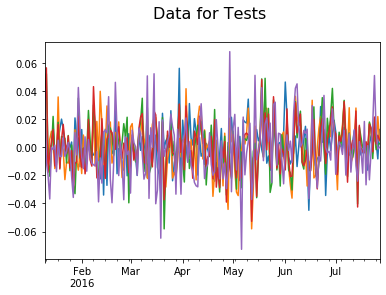

In [4]:
import pandas as pd
df = pd.read_excel('data/inputs_outputs.xlsx', header=None)
l_index = pd.date_range(start= '01/10/2016', end='01/10/2019')
df.index = l_index[:df.shape[0]]
print(df.head())

ax = df.plot(legend=False)
ax.set_title('Data for Tests \n', fontsize=16)

In [5]:
df_original = df.copy()

We assume that the data used is stationary (which seems reasonable by looking at the graph). There seems to be no seasonality, trend, variance increase etc. 

$$
\begin{aligned}
Y &:= \left(  y_1, \dots, y_T \right)  \;\;\;\;\; &\left(K \times T \right)\\
B &:= \left(  \mu,\, A_1 \dots, A_p \right)  \;\;\;\;\; &\left(K \times (Kp + 1) \right)\\
Z_t &:= \left(  1, y_t, \dots, y_{t-p+1} \right)'  \;\;\;\;\; &\left(1 \times (Kp + 1) \right)\\
Z &:= \left(  Z_0, \dots, Z_T \right)  \;\;\;\;\; &\left((Kp + 1) \times T \right)
\end{aligned}
$$

We rewrite the var as being of the form $ Y = B Z + U $, implying that the residuals are of the form $ U = Y - BZ $. To determine the least squares estimator (see \textsc{Econometric Methods with Application in Business and Economics}), we write the sum of the residual squares as:
$$
\begin{aligned}
S(b) &= \sum U^2 = U'U = \left( Y - BZ \right)' \left( Y - BZ \right)\\
     &= Y'Y - Y'BZ - B'Z'Y + B'Z'ZB\\
\end{aligned}
$$

As $ Y'ZB = B'Z'Y $, we can rewrite the above equation as

$$S(b) = Y'Y - 2B'Z'Y + B'Z'ZB$$

Taking the derivative with respect to $B$ and setting equal to 0, we obtain

$$
\begin{aligned}
S(b) &= \sum U^2 = U'U = \left( Y - BZ \right)' \left( Y - BZ \right)\\
     &= Y'Y - Y'BZ - B'Z'Y + B'Z'ZB\\
\end{aligned}
$$

A file called *var_model* implementing this model was created in the repository. The values will be compared with the values obtained with the implementation from the library *statsmodels* from Python. 

In [6]:
import var_model.vector_autoregression as var
self = var.VectorAutoregression(df)
self.fit(3)

In [8]:
# print matrices A
import pandas as pd
for idx, A in enumerate(self.na_A):
    print("A{}:\n {}".format(idx + 1, pd.DataFrame(A)))        

A1:
           0         1         2         3         4
0 -0.043374  0.128951 -0.127479  0.049648 -0.071250
1  0.005321  0.178780  0.003759  0.032509 -0.072283
2  0.008242  0.115180 -0.050708  0.007212 -0.041946
3  0.035804  0.166959  0.048654 -0.117873 -0.049864
4 -0.064091 -0.059743 -0.097786  0.268141 -0.054190
A2:
           0         1         2         3         4
0  0.013431  0.001495 -0.242662  0.245055 -0.075217
1 -0.244118 -0.004717 -0.345717  0.413840 -0.032270
2 -0.047898  0.179970 -0.487353  0.295174  0.055272
3 -0.043729  0.159101 -0.365092  0.193884  0.068610
4 -0.028104  0.096378 -0.391956  0.162951 -0.030571
A3:
           0         1         2         3         4
0 -0.044115  0.015434  0.056729 -0.180469  0.065909
1 -0.075600 -0.076008  0.070572  0.017278  0.042417
2 -0.110870  0.027031 -0.034428 -0.013438 -0.022812
3 -0.040539  0.032051 -0.016870 -0.037124 -0.001811
4 -0.046125 -0.081289  0.247950 -0.131097 -0.025088


The matrix $ \Sigma_U $ was estimated directly by the definition $ \tilde{\Sigma}_U = \mathbf{E} \left[u_t u_t '\right] $, that is, I calculated the matrix $ U = Y - BZ $ and computed the outer product for its transposed and divided it by T. Then I adjusted the result by the model's degree of freedom, so that $ \hat{\Sigma}_{U} =\frac{T}{T - Kp -1} \tilde{\Sigma}_{U}$.

In [9]:
import pandas as pd
print("Sigma_U:\n {}".format(pd.DataFrame(self.na_Sigma)))

Sigma_U:
           0         1         2         3         4
0  0.000195  0.000068  0.000056  0.000077  0.000064
1  0.000068  0.000283  0.000154  0.000166  0.000117
2  0.000056  0.000154  0.000309  0.000255  0.000126
3  0.000077  0.000166  0.000255  0.000267  0.000130
4  0.000064  0.000117  0.000126  0.000130  0.000461


Now, compare these values with the values obtained from *statsmodels*.

In [10]:
from statsmodels.tsa.api import VAR
import statsmodels.tsa.vector_ar.util as util
model = VAR(df)
results = model.fit(3)
aux = util.get_var_endog(df.values, 3)

In [11]:
# Compute Errors
print("error in Z: {:0.8f}".format(sum(sum(abs(self.na_Z.T - aux)))))
print("error in A: {:0.8f}".format(sum(sum(sum(abs(self.na_A - results.coefs))))))
print("error in B: {:0.8f}".format(sum(sum(abs(self.na_betahat - results.params.values)))))
print("error in Sigma_U: {:0.8f}".format(sum(sum(abs(self.na_Sigma - results.sigma_u.values)))))

error in Z: 0.00000000
error in A: 0.00000000
error in B: 0.00000000
error in Sigma_U: 0.00000000


As can be seen, up to the eighth decimal, the values obtained were identical to those obtained by the benchmark library.

### 2.2. Forecast

To state what will happen in the future $\left(y_1, ..., y_k \right) $, with a process $VAR(p)$ adjusted to a data set $ \Omega_t = \{y_s \mid s\leq t\} $ for a $ h $ time horizon, we need to determine which is the optimal *forecast* by determining the one that minimizes a cost function associated with its errors (mean squares - MSE). The predictor that minimizes these errors is the conditional expectation (Lutkepohl, p. 33)

$$\mathbf{E}\left[ y_{t+h} \right] := \mathbf{E}\left[ y_{t+h} \mid  \Omega_t \right] = \mathbf{E}\left[ y_{t+h} \mid  \{ y_s \mid s \leq t \} \right]$$

$$
\mathbf{E}\left[ y_{t+1} \right ] = \mu + A_1 y_t + ... + A_p y_{t-p + 1} \\
\mathbf{E}\left[ y_{t+2} \right ] = \mu + A_1 \mathbf{E}\left[ y_{t+1} \right] + A_2 y_t + ... + A_p y_{t-p + 2} \\
\vdots
$$

Applying this method and comparing it with the benchmark implementation, we arrive that

In [12]:
my_forecast, my_max, my_min = self.forecast(df[-3:].values, 1)
na_forecast = results.forecast_interval(df[-3:].values, 1)

In [13]:
# One step Ahead forecast for each variable
print("error in Forecast: {:0.8f}\n".format((sum(abs(my_forecast - na_forecast[0][0])))))
print(pd.Series(my_forecast))

error in Forecast: 0.00000000

0    0.001801
1    0.006724
2    0.006905
3    0.005442
4    0.000813
dtype: float64


### 2.3. Confidence Intervals

The prediction error (and consequently, the confidence interval) can be obtained through the error variance-covariance matrix (MSE matrix). However, when you want to perform *forecasts* for more than one period, you must also define the Moving Average(MA) coefficient matrix, which for a VAR(2) is

$$
\phi_1 = A_1 \\
\phi_2 = \phi_1 A_1 + A2 \\
\phi_3 = \phi_2 A_1 + \phi_1 A2 \\
\vdots \\
\phi_i = \phi_{i-1} A_1 + \phi_{i-2} A_2
$$

Thus, the *forecast* MSE matrix is obtained recursively by applying

$$
\Gamma_y(0) = \Sigma_y = \sum_{i=0}^{\infty} \phi_i \Sigma_u \phi_i^{'}
$$

$$
\Sigma_y (1) = \Sigma_u \\
\Sigma_y (2) = \Sigma_u + \phi_{1} \Sigma_u \phi_{1}' \\
\Sigma_y (3) = \Sigma_y (2) + \phi_{2} \Sigma_u \phi_{2}' \\
\vdots
$$

The $ h $ in $ \Sigma_y(h) $ refers to how many steps ahead (forward in future time) the forecast function applies. Since the VAR model assumes that $ u_t \sim N \left (0, \, \Sigma_y(h) \right) $ errors, we can assume that the *forecast* error is also normally distributed. With this assumption, we can define a confidence interval of the form

$$ \left[y_{k, \, t}(h) - z_{(\alpha /2)} \sigma_k(h), \, \, \, \, \, y_{k, \, t}(h) + z_{(\alpha / 2)} \sigma_k (h) \right] $$

Where $ \sigma(h) $ is the square root of the ** *k-th* diagonal element ** $ \Sigma_y(h) $:

$$
\Sigma_y(1) =
\begin{pmatrix}
  \textbf{2.25} & 0 & 0 \\
  0 & \textbf{1.0} & .5 \\
  0 & .5 & \textbf{.74}
\end{pmatrix}
$$

Confidence intervals are given by

$$
y_{1, t} (1) \pm z_{(\alpha / 2)} \sqrt{2.25} \\
y_{2, t} (1) \pm z_{(\alpha / 2)} \sqrt{1.0} \\
y_{3, t} (1) \pm z_{(\alpha / 2)} \sqrt{.74}
$$

So, let's calculate the confidence intervals for 3 periods ahead and compare with the implementation of the *benchmark*.

In [14]:
import var_model.vector_autoregression as var
import numpy as np
import pandas as pd
self = var.VectorAutoregression(df)
self.fit(3)

In [15]:
my_forecast, my_max, my_min = self.forecast(df[-5:].values, 3)
na_forecast, na_min, na_max = results.forecast_interval(df[-3:].values, 3)

In [16]:
print("Lower bound error: {:0.7f}".format(sum(abs(na_min[-1] - my_min))))
print("Forecast Error: {:0.7f}".format(sum(abs(na_forecast[-1] - my_forecast))))
print("Upper bound error: {:0.7f}".format(sum(abs(na_max[-1] - my_max))))
print('\n\n')
df_plot = pd.DataFrame([my_min, na_min[-1]], index=['my model', 'statsmodels'])
df_plot.index.name = 'Minimum'
print(str(df_plot))
print('')

df_plot = pd.DataFrame([my_max, na_max[-1]], index=['my model', 'statsmodel'])
df_plot.index.name = 'Maximum'
print(df_plot)

Lower bound error: 0.0000000
Forecast Error: 0.0000000
Upper bound error: 0.0000000



                    0         1         2         3         4
Minimum                                                      
my model    -0.030019 -0.035569 -0.037285 -0.034497 -0.046392
statsmodels -0.030019 -0.035569 -0.037285 -0.034497 -0.046392

                   0         1         2         3         4
Maximum                                                     
my model    0.026364  0.033363  0.034616  0.032315  0.040077
statsmodel  0.026364  0.033363  0.034616  0.032315  0.040077


Although the *forecast* was the same as the implementation of *statsmodels*, the intervals found were slightly different. However, the error in relation to the implementation of the *benchmark* was symmetrical, which suggests that they used a different estimation method than the one implemented here. The dcumentation reveals that the inverse Hessian 

### 2.4. Selecting lag order for VAR

The order has to be chosen so that the projections have the best precision (or the smallest mean square error). There is no single way to do this. One option is to use the final prediction error (FPE) criterion, defined as

$$FPE(m) = \left[ \frac{T + Km + 1}{T - Km -1} \right]^{K} \left |  \Sigma_u(m) \right | $$

Another criterion is The Akaike Information Criterion (AIC), defined as

$$AIC(m) = \ln \left| \Sigma_u(m) \right| + \frac{2mK^2}{T}$$

A third option is the Hannan-Quinn Criterion, which has interesting sample properties (consistency, in this case):

$$HQ(m) = \ln \left|  \Sigma_u(m) \right| + \frac{2\ln \ln T}{T}mK^2$$

The last option implemented will be another one with the same asymptotic property of the previous criterion. Schwarz's criterion (SC or BIC):

$$SC(m) = BIC(m) = \ln \left|  \Sigma_u(m) \right| + \frac{\ln T}{T}mK^2$$

In [34]:
import var_model.vector_autoregression as var
import numpy as np
import pandas as pd
self = var.VectorAutoregression(df)

In [33]:
self.select_order(10)

Ordem com menor valor para cada Critério:
  Criterion FPE:  		Ord. 1
  Criterion AIC:  		Ord. 6
  Criterion HQ:  		Ord. 1
  Criterion SC(BIC):  		Ord. 1




       FPE      AIC       HQ  SC(BIC)
Ordem                                
1      0.0 -10.5605 -10.5571 -10.5508
2      0.0 -10.5590 -10.5522 -10.5395
3      0.0 -10.5612 -10.5511 -10.5320
4      0.0 -10.5618 -10.5483 -10.5229
5      0.0 -10.5642 -10.5473 -10.5155
6      0.0 -10.5651 -10.5449 -10.5068
7      0.0 -10.5649 -10.5413 -10.4967
8      0.0 -10.5632 -10.5362 -10.4853
9      0.0 -10.5596 -10.5293 -10.4720
10     0.0 -10.5569 -10.5232 -10.4596


In this case, we would take the order 1. The autocorrelation function reveals that residuals are white noise:

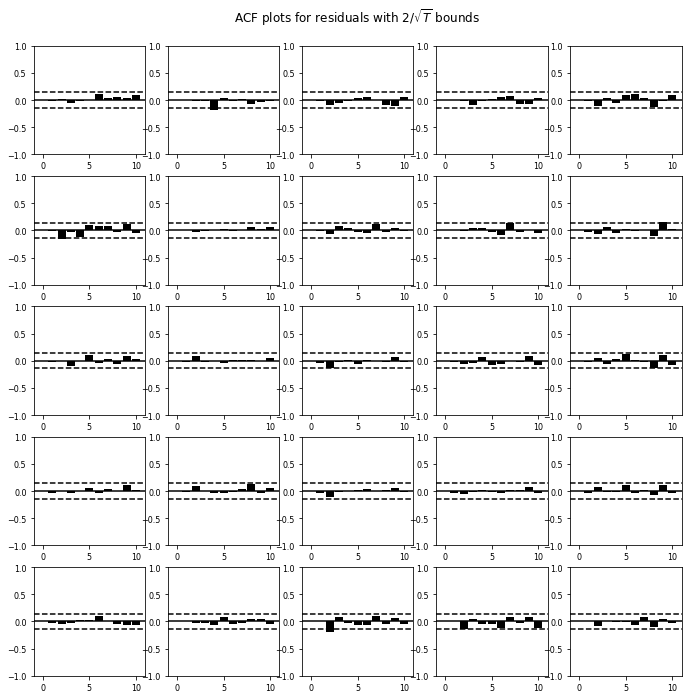

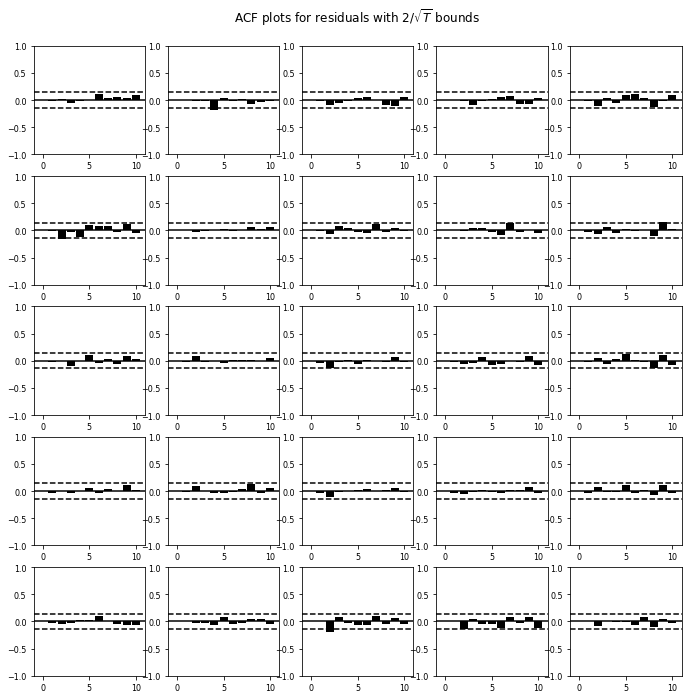

In [19]:
model = VAR(df)
results_1 = model.fit(1)
results_1.plot_acorr()

### 2.5 Impulse Response Analysis

Impulse response analysis is an important step in econometric analyses. Their main purpose is to describe the evolution of a model’s variables in reaction to a shock in one or more variables. This feature allows to trace the transmission of a single shock within an otherwise noisy system of equations and, thus, makes them very useful tools in the assessment of economic policies.

Since all variables in a VAR model depend on each other, individual coefficient estimates only provide limited information on the reaction of the system to a shock. In order to get a better picture of the model’s dynamic behaviour, impulse responses (IR) are used. The departure point of every impluse reponse function for a linear VAR model is its moving average (MA) representation, which is also the Forecast Error Impulse Response (FEIR) function. The FEIR $\Phi_i$ for the ith period after the shock is obtained by

$$\Phi_i= \sum_{j=1}^{i} \Phi_{i−j}A_j,  i=1,2,...$$

with $\Phi_0=I_K$ and $A_j=0$ for $j>p$, where $K$ is the number of endogenous variables and $p$ is the lag order of the VAR model.

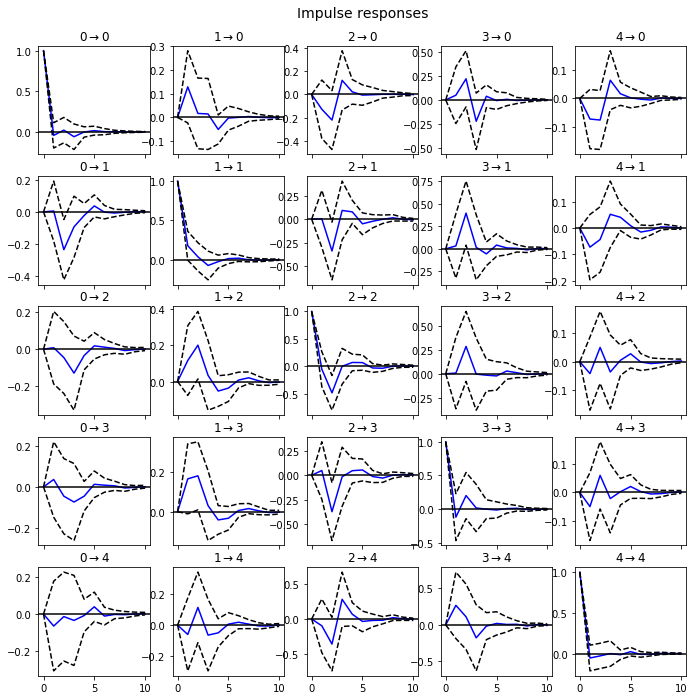

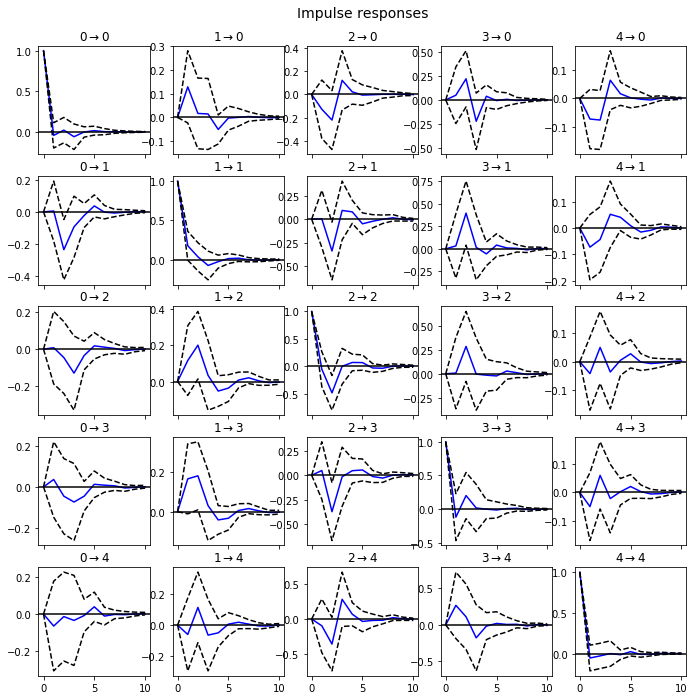

In [20]:
irf = results.irf(10)
irf.plot(orth=False)

A caveat of FEIRs is that they cannot be used to assess contemporaneous reactions of variables. This can be explained by the fact that for the construction of $\Phi_i$ only the coefficient matrices $A_j$ are used, which contain no information on contemporaneous relationships. 

Correlation matrices only describe the correlation between the errors, but it remains unclear in which direction the causalities go. Identifying these causal relationships is one of the main challenges of any VAR analysis.

#### 2.5.1 Orthogonal Impulse Responses

Regardless of the specific methods used to identify the shocks of a linear VAR model, further information on contemporaneous relationships can be introduced to the FEIR by simply multiplying it by a matrix $F$:
$$\Theta_i = \Phi_i F \ for \ i=0,1, \dots$$

A common approach to identify the shocks of a VAR model is to use orthogonal impulse respones (OIR). The basic idea is to decompose the variance-covariance matrix so that \Sigma = PP^{\prime}, where $P$ is a lower triangular matrix with positve diagonal elements, which is often obtained by a Choleski decomposition. 

The corresponding orthongonal impulse response function is then
$$\Theta^o_i = \Phi_i P$$

#### 2.5.2 Forecast Error Variance Decomposition (FEVD)

Forecast errors of component j on k in an i-step ahead forecast can be decomposed using the orthogonalized impulse responses $\Theta_i$:

\begin{align}
\begin{aligned}
\omega_{jk, i} = \sum_{i=0}^{h-1} (e_j^\prime \Theta_i e_k)^2 / \mathrm{MSE}_j(h)\\\mathrm{MSE}_j(h) = \sum_{i=0}^{h-1} e_j^\prime \Phi_i \Sigma_u \Phi_i^\prime e_j
\end{aligned}
\end{align}

For the five step ahead:

FEVD for 0
            0         1         2         3         4
0    1.000000  0.000000  0.000000  0.000000  0.000000
1    0.971327  0.005189  0.013500  0.000217  0.009767
2    0.945539  0.005098  0.020162  0.009253  0.019948
3    0.929282  0.005436  0.020246  0.018314  0.026722
4    0.925424  0.005601  0.023253  0.018635  0.027087

FEVD for 1
            0         1         2         3         4
0    0.084501  0.915499  0.000000  0.000000  0.000000
1    0.083753  0.909278  0.000052  0.000028  0.006889
2    0.099617  0.866479  0.002851  0.022149  0.008904
3    0.100935  0.852243  0.012840  0.021921  0.012060
4    0.100709  0.848714  0.014423  0.022133  0.014020

FEVD for 2
            0         1         2         3         4
0    0.051074  0.226907  0.722018  0.000000  0.000000
1    0.050911  0.229670  0.717235  0.000002  0.002182
2    0.047423  0.224558  0.710721  0.012349  0.004948
3    0.056622  0.222245  0.702519  0.012229  0.006385
4    0.057161  0.221771  0.702470  0.012209  0.

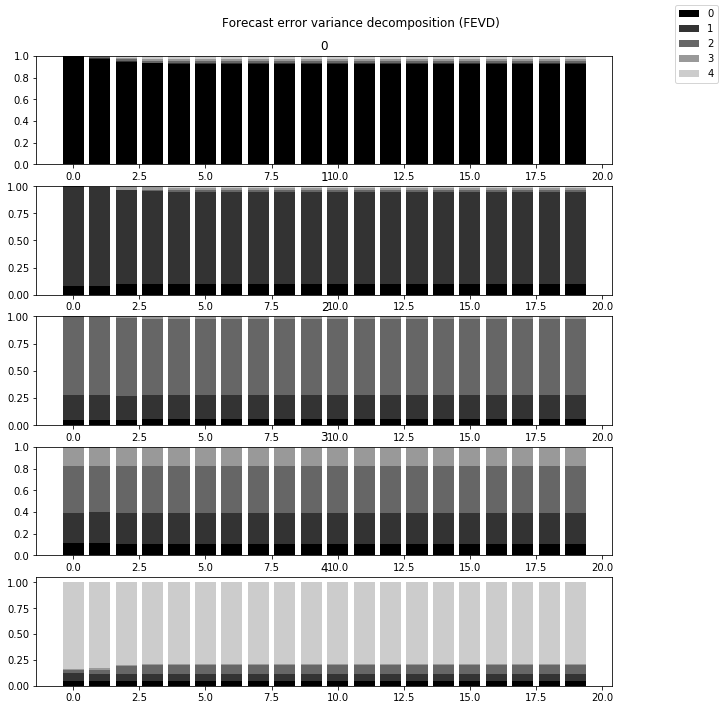

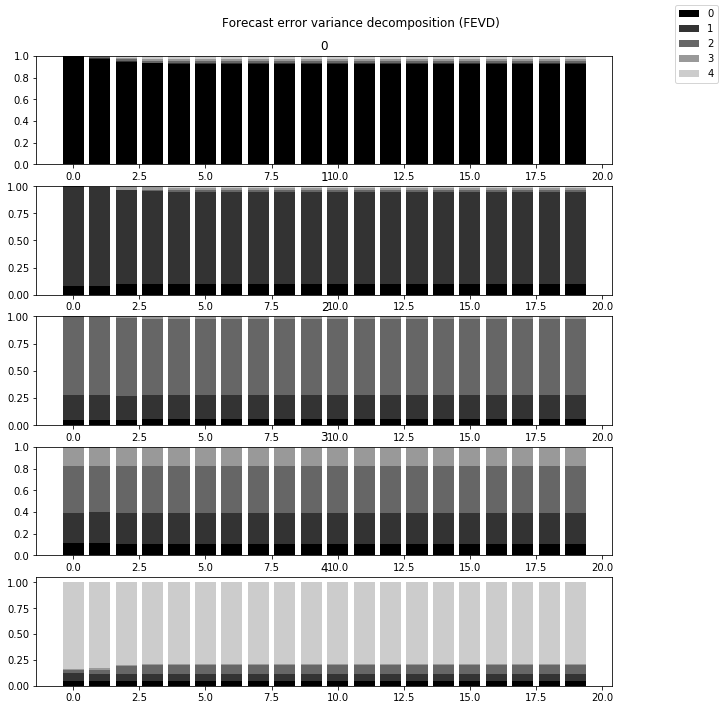

In [35]:
fevd = results.fevd(5)
fevd.summary()
results.fevd(20).plot()

## 3. Applying the VAR model

In this section I will apply the model to the high frequency Dolar future data. Data will be grouped in intervals of 10 seconds. Rather than fitting the model to returns, the model is applied to the first difference of the selected variables.

### 3.1. Order Flow Imbalance

Trading book events - market orders, limit and cancellations orders - impact the asset price dynamics. This impact can be modeled by a single variable: the *order flow imbalance* (OFI), which represents the *net* of the quantity that entered and left the bid and ask queues. Thus, for each event $ E_n$:

$$e_n = \mathbb{1}_{P_{n}^{B} \geq P_{n-1}^{B}} q^{B}_{n} - \mathbb{1}_{P_{n}^{B} \leq P_{n-1}^{B}}  q^{B}_{n-1} - \mathbb{1}_{P_{n}^{A} \leq P_{n-1}^{A}} q^{A}_{n} + \mathbb{1}_{P_{n}^{A} \geq P_{n-1}^{A}}  q^{A}_{n-1}$$

Where $ q^{B}_{n} $, $ q^{A}_{n} $ refer to the quantity at the best price in Bid and Ask, respectively in the current period $ n $. The subscript $ n-1 $ refers to the previous state. Since events affecting the book happen at random $ \tau_n $ times, we define $ N(t) = \max\{n \mid \tau_n \leq t \} $ the number of events that occurred between $ \left[0 , \, t \right] $. The OFI variable is defined over the interval $ \left[t_{k-1}, \, t_k \right] $ and is the sum of each $ e_n $ that occurred in this period:

$$OFI_k = \sum^{N(t_k)}_{n=N(t_{k-1})+1} e_n$$

This variable can explain the change in mid-price in short periods of time using a simple linear relationship (*The Price Impact of Order Book Events*). The intuition, according is that "it needs volume to move the price". The change in mid-price, in their study, is defined in ticks:

$$\Delta P_k = \frac{\left( P_k - P_{k-1}\right)}{\delta}$$

where $ \delta $ is the tick size of the analyzed instrument.

### 3.2. Computing the OFI

Let's start by computing the OFI for two days of Level I data (http://www.investopedia.com/terms/l/level1.asp) from the contract book. First, let's check the file size

In [22]:
import var_model.vector_autoregression as var
import numpy as np
import pandas as pd

In [37]:
import zipfile
s_fname = "data/dol.zip"
archive = zipfile.ZipFile(s_fname, 'r')
def foo():
    f_total = 0.
    f_tot_rows = 0.
    for i, x in enumerate(archive.infolist()):
        f_total += x.file_size/ 1024.**2
        for num_rows, row in enumerate(archive.open(x)):
            f_tot_rows += 1
        print("{}:\t{:,.0f} rows\t{:0.2f} MB".format(x.filename, num_rows + 1, x.file_size/ 1024.**2))

%time foo()

dol.txt:	756,137 rows	24.60 MB
Wall time: 1.35 s


Now, let's calculate line by line the value of $ e_n $ and cumulate it for 10 seconds. Each time I pass this time, I will print the cumulated data in a new file and reset the values. I will also pair this data with the change in the asset's mid-price, already standardized by the tick-size (half point). I will also save the return log in these 10 seconds.

In [38]:
def measure_e_n(row, last_best):
    '''
    Measure the e_n of the current event
    :param row: dictionary. current row from the file
    :param last_best: tuple. best price and best quantity
    '''
    e_n = 0
    if row['Type'] == 'BID':
        e_n += (row['Price'] >= last_best[0]) * row['Size']
        e_n -= (row['Price'] <= last_best[0]) * last_best[1]
    elif row['Type'] == 'ASK':
        e_n -= (row['Price'] <= last_best[0]) * row['Size']
        e_n += (row['Price'] >= last_best[0]) * last_best[1]
    return e_n

def convert_float_to_time(f_time):
    '''
    Converst number of seconds in string time format
    '''
    i_hour = int(f_time / 3600)
    i_minute = int((f_time - i_hour * 3600) / 60)
    i_seconds = int((f_time - i_hour * 3600 - i_minute *60 ))
    return '{:02d}:{:02d}:{:02d}'.format(i_hour, i_minute, i_seconds)

In [39]:
'''
import zipfile
import csv
import time
f_start = time.time()
s_fname = "data/dol.zip"
fw_out = open('data/ofi_dol.txt', 'w')
fw_out.write('TIME\tOFI\tDELTA_MID\tLOG_RET\n')
archive = zipfile.ZipFile(s_fname, 'r')
f_total = 0.
f_tot_rows = 0.
d_best_price = {'BID': (0., 0.), 'ASK': (0., 0.)}
f_min_time = 10.  # seconds
for i, x in enumerate(archive.infolist()):
    # each file within the zip file (in this case, there is only 1 file)
    f_ofi = 0.
    f_mid = None
    f_next_time = 9 * 3600 + f_min_time
    for idx_row, row in enumerate(csv.DictReader(archive.open(x), delimiter='\t')):
        if idx_row == 0:
            f_first_price = row['Price']
        # no need to deal with trades, because it's already reflected in the bid and ask
        if row['Type'] in ['BID', 'ASK']:
            # converte string para float
            row['Price'] = float(row['Price'].replace(',', '.')) 
            row['Size'] = float(row['Size'])
            f_current_time = sum([float(x)*60**(2.-i_aux)  for i_aux, x in enumerate(row['Date'][-8:].split(":"))])
            if f_current_time > f_next_time:
                # print results
                s_time = convert_float_to_time(f_next_time)
                f_change = 0
                f_logrtn = 0.
                if f_mid:
                    f_curent_mid = (d_best_price['ASK'][0] + d_best_price['BID'][0])/2.
                    f_change = int((f_curent_mid - f_mid)/0.5)
                    f_logrtn = np.log((f_curent_mid/f_mid))
                f_mid = (d_best_price['ASK'][0] + d_best_price['BID'][0])/2.
                s_out = '{}\t{}\t{}\t{}\n'.format(s_time, f_ofi, f_change, f_logrtn)              
                fw_out.write(s_out)
                # zero value
                f_ofi = 0
                 # prints every 10s
                f_next_time  = (int(f_current_time/f_min_time) + 1)*f_min_time
            elif abs(f_current_time - f_next_time) > 3600:
                # new day
                f_next_time = 9 * 3600
                f_mid = None
                f_ofi = 0
            # compare with last value
            last_best = d_best_price[row['Type']]
            f_e_n = measure_e_n(row, last_best)
            # update last best
            d_best_price[row['Type']] = (row['Price'], row['Size'])
            row['Date'] = row['Date'][-8:]
            f_ofi += f_e_n
            
print('Time to process: {:0.2f} s'.format(time.time() - f_start))
'''and None

Let's take a look at how the data looks like

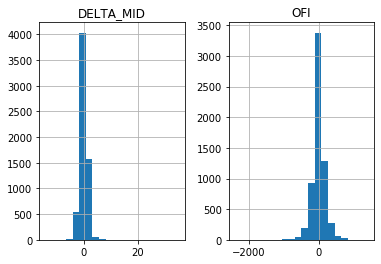

In [40]:
import pandas as pd
df = pd.read_csv('data/ofi_dol.txt', sep='\t')
df.drop('TIME', axis=1, inplace=True)
df.dropna(inplace=True)
df[['OFI', 'DELTA_MID']].hist(bins=20);


It looks like we have some outliers. Let's exclude the most extreme points. To classify these points, I will calculate the value between the 1st and 90th percentiles and check which points are outside 1.5 times this interval in addition to the mentioned percentiles.

In [44]:
import numpy as np
# For each column, find maximum and minimum extreme values
d_unique_idx = dict()
d_iqr = {}
print("Number of data points considered as outliers for the variable\n")
for feature in df.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(df[feature], 1)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(df[feature], 90)
    
    # calcula intervalo interquartil e calcula o tamanho para ser outlier
    d_iqr[feature] = (Q3-Q1)
    step = 1.5*(Q3-Q1)
    
    # Mostra outliers
    df_out_lier = df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))]
    i_nfeatures = df_out_lier.shape[0]
    print("{:18s}\t{:18s}".format(feature, str(i_nfeatures)))
    for x in df_out_lier.index:
        if x not in d_unique_idx.keys():
            d_unique_idx[x] = 1
        else:
            d_unique_idx[x] += 1

print("-------------------------")
print("TOTAL: Outliers: {} | Unique Outliers: {}".format(sum(d_unique_idx.values()),
                                                          len(d_unique_idx.keys())))
# filter outliers
print("\nOutliers:")
df.loc[d_unique_idx.keys(), :]

Number of data points considered as outliers for the variable

OFI               	2                 
DELTA_MID         	6                 
LOG_RET           	4                 
-------------------------
TOTAL: Outliers: 12 | Unique Outliers: 7

Outliers:


,OFI,DELTA_MID,LOG_RET
1881,-2380.0,-14.0,-0.002128
4782,1395.0,7.0,0.001122
10,835.0,8.0,0.001204
11,655.0,9.0,0.001428
3132,675.0,8.0,0.001302
3176,265.0,35.0,0.005345
6036,1025.0,12.0,0.001875


Now, let's plot the scatter plot of the data without the points above

In [45]:
df2 = df.loc[[x for x in df.index if x not in d_unique_idx.keys()]]

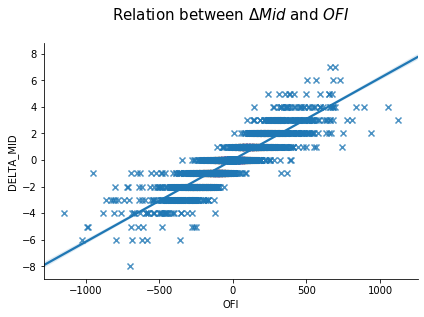

In [46]:
import seaborn as sns
ax = sns.lmplot(x="OFI", y="DELTA_MID", data=df2, markers=["x"], palette="Set2", height=4, aspect=1.5)
ax.ax.set_title('Relation between $\Delta Mid$ and $OFI$\n', fontsize=15);

As expected, there is a clear linear relationship between the volume that entered or left the book and the change in price of the asset, when considered a short period of time. In the next section, I will use this variable to try to improve the result of the VAR model in forecasting the returns.

### 3.3. Fitting the VAR Model to Calculated Data

First, it is necessary to check if the variables are stationary. However, we will do this only visually here.

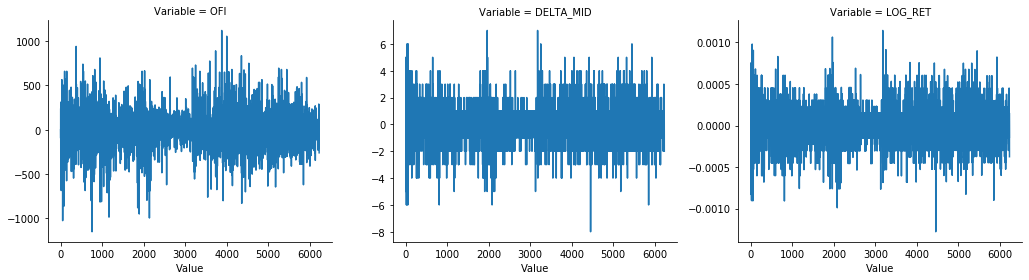

In [47]:
import matplotlib.pyplot as plt
df_plot = df2.unstack().reset_index()
df_plot.drop('level_1', axis=1, inplace=True)
df_plot.columns = ['Variable', 'Value']
g = sns.FacetGrid(df_plot, col="Variable", sharey=False,  height=4, aspect=1.2)
g = g.map(plt.plot, "Value")

The average seems to be constant, since the standard deviation should not be. Also note that all variables have a different scale. Now, let's see what the best VAR order fits into this data (disregarding the return log).

In [49]:
df3 = df2.copy()

In [51]:
import var_model.vector_autoregression as var
import numpy as np
import pandas as pd
self = var.VectorAutoregression(pd.DataFrame(df3[['OFI', 'DELTA_MID']]))
self.select_order(18)

Ordem com menor valor para cada Critério:
  Criterion FPE:  		Ord. 16
  Criterion AIC:  		Ord. 16
  Criterion HQ:  		Ord. 6
  Criterion SC(BIC):  		Ord. 1




          FPE     AIC      HQ  SC(BIC)
Ordem                                 
1      1.6930  9.2636  9.2651   9.2680
2      1.6927  9.2636  9.2666   9.2723
3      1.6818  9.2573  9.2618   9.2703
4      1.6766  9.2544  9.2604   9.2717
5      1.6697  9.2504  9.2579   9.2720
6      1.6666  9.2487  9.2577   9.2747
7      1.6667  9.2489  9.2594   9.2792
8      1.6672  9.2494  9.2614   9.2840
9      1.6675  9.2497  9.2633   9.2887
10     1.6679  9.2501  9.2651   9.2934
11     1.6671  9.2498  9.2663   9.2975
12     1.6669  9.2499  9.2679   9.3018
13     1.6647  9.2487  9.2682   9.3050
14     1.6669  9.2502  9.2712   9.3108
15     1.6634  9.2482  9.2708   9.3132
16     1.6593  9.2459  9.2700   9.3153
17     1.6623  9.2479  9.2734   9.3216
18     1.6625  9.2482  9.2752   9.3262


The criteria indicated different orders. Let's see how the projections look with a model of order 16, initially.

In [57]:
def measure_on_data(i_var_order, l_col):
    var_6 = var.VectorAutoregression(df3[l_col])
    var_6.fit(i_var_order)
    l_rtn = []
    # f_val = float(f_first_price.replace(',', '.'))
    f_val = 0
    df4 = df3[l_col].reset_index(drop=True)
    l_label = df4.columns
    for i_idx in range(i_var_order, df4.shape[0]):
        na_y = df4.loc[(i_idx-i_var_order):i_idx-1, :].values
        na_rtn, na_max, na_min= var_6.forecast(na_y, 1)
        na_yr = df4.loc[i_idx, :]

        d_aux = {'ID': i_idx}
        for x in range(len(l_label)):
            d_aux[l_label[x] + '_OBSV'] = na_yr[x]
            d_aux[l_label[x] + '_FORC'] = na_rtn[x]
            d_aux[l_label[x] + '_MAX'] = na_max[x]
            d_aux[l_label[x] + '_MIN'] = na_min[x]

        l_rtn.append(d_aux)

    df_test = pd.DataFrame(l_rtn)
    df_test.index = df_test['ID']
    df_test.drop('ID', axis=1, inplace=True)
    
    return df_test

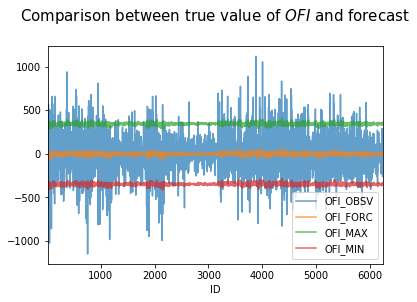

In [58]:
df_test = measure_on_data(16, l_col=['OFI'])
ax = df_test.plot(alpha=0.7)
ax.set_title('Comparison between true value of $OFI$ and forecast \n', fontsize=15);

Note that the forecasted value ($ OFI \_FORC $) was far from what was observed. So, instead of looking at the forecasted value, let's focus on the sign of the values and check if the forecasted value pointed to the same side as the realized one. Below I will plot the percentage of times that the model hit the market side, adjusting several VARs of different orders with different combinations of variables. The objective is always to predict the first variable of each line, according to the legend.

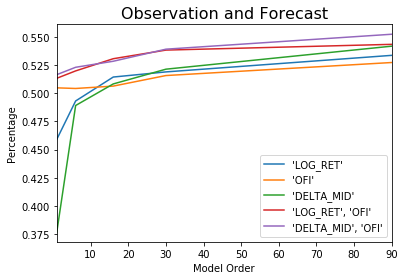

In [59]:
ax = None
for l_col in [['LOG_RET'], ['OFI'], ['DELTA_MID'], ['LOG_RET', 'OFI'], ['DELTA_MID', 'OFI']]:
    d_rtn = {}
    l_orders_to_test = [1, 6, 16, 30, 90]  # 10 seg, 40 seg, 2 min e 40 seg, 5 min, 15 min
    for i_ord in l_orders_to_test:
        df_test = measure_on_data(i_ord, l_col=l_col)
        d_rtn[i_ord] = ((df_test[l_col[0] + '_FORC'] / df_test[l_col[0] + '_OBSV'])>=0).sum() * 1. / df_test.shape[0]

    if not ax:
        ax = pd.Series(d_rtn).plot(ax=ax, label = str(l_col)[1:-1])
    else:
        pd.Series(d_rtn).plot(label = str(l_col)[1:-1])
ax.set_title(u'Observation and Forecast', fontsize=16)
ax.legend(loc='lower right')
ax.set_xlabel('Model Order')
ax.set_ylabel('Percentage');

When a VAR model was fitted to only one variable, the one that did best in low orders was the one fitted to predict the OFI, making the next observation of this variable a little more than 50% of the time. However, when we increase the order of the model, the models fitted to the return log and the delta-mid outperform the model fitted only to the OFI. When using more than one variable, the models using the OFI and the mid-price or the OFI and the log-return showed similar performance in models of order up to 50, coming close to hitting the market direction almost 55% of the time . However, in higher orders, the model that used the OFI and the delta-mid was the one that did better, surpassing 55% of accuracy.


## 4. Conclusion

Tests with the VAR model using the proposed variables for high frequency data indicate that it is not suitable if accurate * forecasts * are required. However, when considering the direction of the signal given by the model, the results suggest that it can be a useful tool in the context of * trading *.

## 5. Last Considerations

It would be interesting to perform a back-test with the created models and try to add more variables to analyze if the forecasting will be improved.

## References

1. Ruey S. Tsay. *Analysis of Financial Time Series*. Wiley 2010, Financial Engineering. [*link*](https://www.wiley.com/en-us/Analysis+of+Financial+Time+Series%2C+3rd+Edition-p-9780470414354)
2. H. Lütkepohl.  *New Introduction to Multiple Time Series Analysis*. Springer-Verlag, 2005. [*link*](http://www.springer.com/br/book/9783540401728)
3. Heij, C. and de Boer, P. and Franses, P.H. and Kloek, T. and van Dijk, H.K. and Rotterdam.  *Econometric Methods with Applications in Business and Economics*. OUP Oxford, 2004. [*link*](https://books.google.com.br/books?id=hp4vQZZHfbUC)
4. Cont, R. and Kukanov, A. and Stoikov.  *The Price Impact of Order Book Events*. Journal Of Financial Econometrics, 2014. [*link*](http://ssrn.com/abstract=1712822)